# Regresión logística

Si nuestro dato de salida tiene un valor cualitativo utilizamos y aplicamos la regresión logística. Este modelo tiene los principios de la regresión lineal, pero éste se utiliza para **clasificar**.
____________________

## Librerías

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import fundamentos_ML.utils.paths as path
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Leyendo datos

In [3]:
input_data = path.data_raw_dir('diabetes.csv')
df = pd.read_csv(input_data)
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [7]:
model = LogisticRegression(max_iter = len(X_train))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [8]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

## Matriz de confusión

In [9]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[98,  9],
       [18, 29]])

Realizamos un heatmap para hacer más visual la matriz de confusión

Text(0.5, 257.44, 'Etiqueta de predicción')

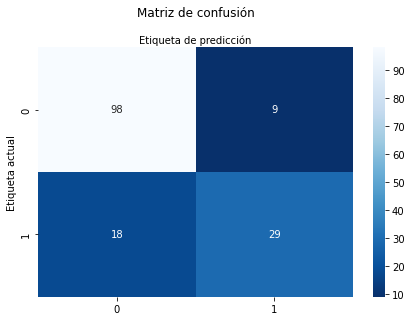

In [10]:
import numpy as np

class_names = [0, 1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de predicción')

De nuestra matriz de confusión, vemos que asignó de manera correcta la etiqueta de verdaderos positivos a 98 pacientes, y los verdaderos negativos a 29 pacientes.

In [12]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')

Exactitud: 0.8246753246753247


Es decir, tenemos una probabilidad de que el 82 % de nuevos datos sean clasificados de manera correcta, esto es, si tiene diabetes o no.